In [1]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import neurodsp
import re
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#messo n_parseg = 150 e sembra avere senso lo spettrogramma anche se non sono 100 come nell'articolo
parseg = 1000
neglect_t = 3000

# FLAT. media a 8 per ogni valore di dd

In [3]:
Dd_values = [round(0.85 + i * 0.005, 3) for i in range(21)] #max 21

In [4]:
function = "flat"
Dd = ["{:.3f}".format(elemento) for elemento in Dd_values]
subnets = "STN"
simulations = [str(i) for i in range(8)]
sigm_par = float('inf')

pow_t_mean_point = []
pow_error_point = []

#fig,ax = plt.subplots(1,1)
for ddd in Dd:
    #funzione Dd
    print(ddd)
    data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T
    data[0] = data[0]/1000
    data[1] = data[1]/1.083

    periodogram_paths = []
    s = []
    for simulation in simulations:
        periodogram_path = './periodograms/' + ddd.replace('.','_') + '_' + subnets + '_' + function + '_' + simulation
        if not os.path.exists(periodogram_path):  #check if periodogram folder exists and if not create one
            os.makedirs(periodogram_path) 
        periodogram_paths.append(periodogram_path)
        ss = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', neglect_t, np.max(data[0]))
        s.append(ss)

    all_pow_t = []
    t = []
    f = []
    for index,ss in enumerate(s):
        output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_paths[index] + "/periodogram.png")

        f = output[0]
        t = output[1]
        Sxx = output[2]

        mask = (8 <= f) & (f <= 26)
        Sxx_lim = Sxx[mask,:]
        f_lim = f[mask]

        pow_t = []
        for i in range(len(t)):
            pow_t.append( np.mean(Sxx_lim[:, i]) )

        all_pow_t.append(pow_t)
        #print(np.mean(pow_t), np.std(pow_t), index)
        #bins = np.linspace(0,0.7,15)
        #plt.hist(pow_t, density = True, histtype = 'step', label = index, bins = bins)
        #plt.legend()
        #plt.show()

        pow_t = np.array(pow_t)

    ###################################################################################################################

    pow_t_mean = np.mean(all_pow_t)

    pow_error = np.std(np.vstack(all_pow_t), axis=0)/np.sqrt(len(simulations))
    pow_error = np.mean(pow_error)

    pow_t_mean_point.append(pow_t_mean)
    pow_error_point.append(pow_error)

print(pow_t_mean_point)
print(pow_error_point)

0.850
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
0.855
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
0.860
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
0.865
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
0.870
nparseg = 1000	noverlap=800
nparseg = 1000	noverlap=800
nparseg = 1000	nov

In [5]:
Dd_values = [0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95]
t_d = [6.0000, 5.7937, 5.5893, 5.3868, 5.1859, 4.9865, 4.7884, 4.5916, 4.3959, 4.2011, 4.0071, 3.8139, 3.6214, 3.4304, 3.2419, 3.0567, 2.8768, 2.7041, 2.5395, 2.3840, 2.2324]
pow_t_mean_point = [0.01997470258312775, 0.021292324013503252, 0.023121112888161804, 0.023098400055090812, 0.024833090186190652, 0.025697509285003067, 0.027356007654268585, 0.029803055694162684, 0.03209961179290857, 0.03525049398427303, 0.037661953553916654, 0.04439350136509073, 0.05119877178163157, 0.06169347014613983, 0.07673955812112734, 0.08793220560788398, 0.11959099854241632, 0.15476134803824243, 0.19455023953829825, 0.20485860364231817, 0.27491934821945785]
pow_error_point = [0.0019681060551574683, 0.002063415742011582, 0.0021825730140744163, 0.002452114876837028, 0.002762969719720987, 0.0029019863541581807, 0.0033957095293001382, 0.003268662905401803, 0.003950217804912973, 0.004575921757142582, 0.004547283237977466, 0.006932893661254162, 0.007325335818725131, 0.008972513591294919, 0.013095476741053068, 0.014624519496493923, 0.016928000320930444, 0.019304395502300294, 0.023538752301767676, 0.024834314672387964, 0.01976996864823682]

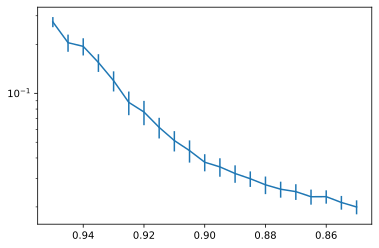

In [6]:
plt.errorbar(Dd_values,pow_t_mean_point,pow_error_point)
plt.yscale('log')
plt.gca().invert_xaxis()
plt.show()

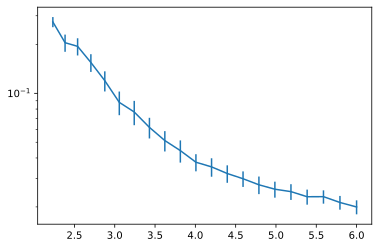

In [7]:
plt.errorbar(t_d,pow_t_mean_point,pow_error_point)
plt.yscale('log')
plt.show()

# SIGMOID0_002 t_mid = 13000 media a 8
# SIGMOID0_00005 t_mid = 90000 

In [1]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import neurodsp
import re
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#messo n_parseg = 150 e sembra avere senso lo spettrogramma anche se non sono 100 come nell'articolo
parseg = 1000
neglect_t = 3000

In [3]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
alpha = 0.2573329144325134
alpha_mean = 0.16799556857190273

In [4]:
Dd_values = [0.95, 0.945, 0.94, 0.935, 0.93, 0.925, 0.92, 0.915, 0.91, 0.905, 0.9, 0.895, 0.89, 0.885, 0.88, 0.875, 0.87, 0.865, 0.86, 0.855, 0.85]
#t_d = np.array([8355.008500189087, 11486.947674539122, 11857.831150374299, 12086.501862336248, 12257.802648841074, 12398.473625471139, 12520.555389266226, 12630.604780514408, 12732.683039948073, 12829.578674258813, 12923.396216686677, 13015.883145289337, 13108.643357557985, 13203.309721381243, 13301.724661749951, 13406.182193197306, 13519.821620774279, 13647.37240636651, 13796.78315643311, 13983.485138246755, 14245.110105920612])
pow_t_mean_point = [0.01821751052788576, 0.019527205527444254, 0.020808697519949845, 0.021035109547683457, 0.022574010469900728, 0.02324902438648401, 0.024726569252750262, 0.026788630799558816, 0.028941753201542443, 0.03170953292130425, 0.03389279025550866, 0.03950104369298528, 0.04593678873525563, 0.054987482172512064, 0.06852429215246683, 0.07838087869402834, 0.10676894475090083, 0.13766782694880128, 0.173113514825627, 0.1823118413495642, 0.24481937358188088][::-1]
pow_error_point = [0.004588698185861985, 0.004796329455529375, 0.005114285383218695, 0.005123761467798073, 0.005726549213584662, 0.006056293908089517, 0.006433404004165514, 0.006754197441264133, 0.007515222917185489, 0.008300960070227976, 0.008525285720901069, 0.010692630877728463, 0.012158553487450974, 0.013445982985577216, 0.01731173947219157, 0.019031149499335827, 0.022603512083601625, 0.02623380167521755, 0.029774720146548427, 0.031132404200706117, 0.030462073137233304][::-1]

In [5]:
t_d = []
t_mid = 90000 - neglect_t + parseg/2
sigm_par = 0.00005

t_d.append(t_mid*0.5)
for x in Dd_values[1:-1]:
    y = -np.log((-0.1) /(x - 0.95) - 1)/sigm_par + t_mid
    t_d.append(y)
t_d.append(t_mid*1.5)

t_d = np.array(t_d)

In [ ]:
function = "sigmoid0_00005"
Dd = "0.950"
subnets = "STN"
simulations = [str(i) for i in range(8)]
#simulations = simulations[7]
sigm_par = sigm_par

new_Dd = Dd.replace('.','_')
#new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T

data[0] = data[0]/1000
data[1] = data[1]/1.083

#check if periodogram folder exists and if not create one
#spikesim
periodogram_paths = []
s = []
for simulation in simulations:
    periodogram_path = './periodograms/' + Dd.replace('.','_') + '_' + subnets + '_' + function + '_' + simulation
    if not os.path.exists(periodogram_path):  #check if periodogram folder exists and if not create one
        os.makedirs(periodogram_path) 
    periodogram_paths.append(periodogram_path)
    ss = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', neglect_t, np.max(data[0]))
    s.append(ss)

all_pow_t = []
t = []
f = []

for index,ss in enumerate(s):
    output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_paths[index] + "/periodogram.png")

    f = output[0]
    t = output[1]
    Sxx = output[2]

    mask = (8 <= f) & (f <= 26)
    Sxx_lim = Sxx[mask,:]
    f_lim = f[mask]

    pow_t = []
    for i in range (len(t)):
        pow_t.append(np.mean(Sxx_lim[:,i]))

    all_pow_t.append(pow_t)


np.vstack(all_pow_t)
pow_t_mean = np.mean(all_pow_t, axis=0)
pow_error = np.std(all_pow_t, axis=0)/np.sqrt(len(simulations))

In [ ]:
# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t_mean, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t_mean = np.array(pow_t_mean)

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)


# Plot dei dati originali

ax1.plot(t[pow_t_mean >= alpha_mean], pow_t_mean[pow_t_mean >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t_mean, label='Intensità media', color='lightblue')
ax1.set_yscale('log')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
ax1.errorbar(t_d/1000, pow_t_mean_point, yerr=pow_error_point, fmt='o', label='Dati aggiuntivi', color='green')

# Imposta altre personalizzazioni per il tuo grafico, se necessario
plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie

ax2 = ax1.twinx()
ax2.plot(data[0][neglect_t*10:]-data[0][neglect_t*10], data[1][neglect_t*10:], 'r-')
ax2.set_xlim(data[0][neglect_t*10], data[0][-neglect_t*10 - int(parseg/2*10)])
ax2.set_ylim(0.83,0.97)
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-sigm_par * (x - t_mid))) * (0.85 - 0.95) + 0.95

# Ora puoi utilizzare questa funzione per calcolare il valore di y per un dato valore di x.
x = t*1000  # Sostituisci con il valore di x desiderato
d_t = sigmoid(x)

In [ ]:
# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t_mean, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t_mean = np.array(pow_t_mean)

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(d_t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)


# Plot dei dati originali

ax1.plot(d_t[pow_t_mean >= alpha_mean], pow_t_mean[pow_t_mean >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(d_t, pow_t_mean, label='Intensità media', color='lightblue')
ax1.set_yscale('log')

# Aggiungi la moving average al grafico di ax1
ax1.plot(d_t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
ax1.errorbar(Dd_values, pow_t_mean_point, yerr=pow_error_point, fmt='o', label='simulazioni a Dd costante', color='green')

# Imposta altre personalizzazioni per il tuo grafico, se necessario
plt.xlabel('Dopamine depletion')
plt.ylabel('intensità media')
plt.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

# FLAT. media a 8

In [61]:
function = "flat"
Dd = "0.850"
subnets = "STN"
simulations = [str(i) for i in range(8)]
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
#new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T

#check if periodogram folder exists and if not create one
#spikesim
periodogram_paths = []
s = []
for simulation in simulations:
    periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function + '_' + simulation
    if not os.path.exists(periodogram_path):
        os.makedirs(periodogram_path) 
    periodogram_paths.append(periodogram_path)
    ss = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', 1000, np.max(data[0]))
    s.append(ss)

In [62]:
#dopamine depletion periodogram
#s.periodogramdd(pop=subnets, data=data, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + function + "_periodogram.png")

In [63]:
data[0] = data[0]/1000
data[1] = data[1]/1.083

nparseg = 1000	noverlap=200
frequenza del massimo: 16.5
valore del massimo: 1.563945333846078
nparseg = 1000	noverlap=200
frequenza del massimo: 17.5
valore del massimo: 1.4718143100549228
nparseg = 1000	noverlap=200
frequenza del massimo: 17.0
valore del massimo: 1.141326742270467
nparseg = 1000	noverlap=200
frequenza del massimo: 15.5
valore del massimo: 1.3393960283929354
nparseg = 1000	noverlap=200
frequenza del massimo: 15.5
valore del massimo: 1.6701906110322466
nparseg = 1000	noverlap=200
frequenza del massimo: 17.0
valore del massimo: 1.4969824062116575
nparseg = 1000	noverlap=200
frequenza del massimo: 16.0
valore del massimo: 1.5609053297388193
nparseg = 1000	noverlap=200
frequenza del massimo: 15.5
valore del massimo: 1.4776392019695284


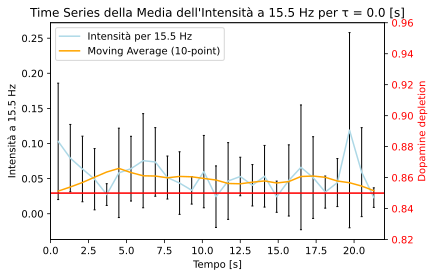

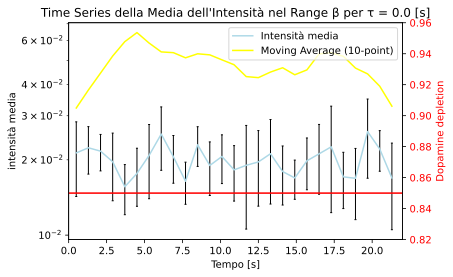

In [64]:
all_Sxx_max_index = []
all_pow_t = []
t = []
f = []
for ss in s:
    output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")

    f = output[0]
    t = output[1]
    Sxx = output[2]

    # faccio somma nel tempo per trovare frequenza max #######################################################
    sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

    # Ottieni l'indice del massimo della funzione
    max_index = np.argmax(sum1)
    max_value = sum1[max_index]
    print('frequenza del massimo:', f[max_index])
    print('valore del massimo:', max_value)

    # 2Estrarre la colonna corrispondente all'indice max_index #########################################################
    Sxx_max_index = Sxx[max_index, :]

    all_Sxx_max_index.append(output[2][max_index])

    ################################################################################################
    mask = (8 <= f) & (f <= 26)
    Sxx_lim = Sxx[mask,:]
    f_lim = f[mask]


    pow_t = []
    for i in range(len(t)):
        pow_t.append( np.mean(Sxx_lim[:, i]) )


    all_pow_t.append(pow_t)

    # Creare un grafico dei valori nel tempo
    # Finestra mobile (rolling window) per il calcolo della moving average
    window_size = 10  # Sostituisci con la dimensione della finestra desiderata
    moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

    pow_t = np.array(pow_t)

###################################################################################################################
Sxx_max_index_mean = np.mean(np.vstack(all_Sxx_max_index), axis=0)
pow_t_mean = np.mean(np.vstack(all_pow_t), axis=0)
Sxx_error = np.std(np.vstack(all_Sxx_max_index), axis=0)
pow_error = np.std(np.vstack(all_pow_t), axis=0)

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, Sxx_max_index_mean, yerr=Sxx_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

ax1.plot(t, Sxx_max_index_mean, label=f'Intensità per {f[max_index]:.1f} Hz', color='lightblue')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index_mean, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0][10000:]-data[0][10000], data[1][10000:], 'r-')
ax2.set_ylim(0.82,0.96)
ax2.set_xlim(0, data[0][-1]-1)
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

# Creare un grafico dei valori nel tempo########################################################
fig, ax1 = plt.subplots()

# Plot dei dati originali
# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

ax1.plot(t, pow_t_mean, label='Intensità media', color='lightblue')
ax1.set_yscale('log')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0][10000:]-data[0][10000], data[1][10000:], 'r-')
ax2.set_xlim(0, data[0][-1]-1)
ax2.set_ylim(0.82,0.96)
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

Sxx_max_index_mean_point = np.mean(Sxx_max_index_mean)
pow_t_mean_point = np.mean(pow_t_mean)
Sxx_error_point = np.std(Sxx_error)
pow_error_point = np.std(pow_error)

In [65]:
function = "flat"
Dd = lista_Dd
subnets = "STN"
simulations = [str(i) for i in range(8)]
sigm_par = float('inf')

Sxx_max_index_mean_point = []
pow_t_mean_point = []
Sxx_error_point = []
pow_error_point = []

for ddd in Dd:
    #funzione Dd
    print(ddd)
    data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T
    data[0] = data[0]/1000
    data[1] = data[1]/1.083

    periodogram_paths = []
    s = []
    for simulation in simulations:
        periodogram_path = './periodograms/' + ddd.replace('.','_') + '_' + subnets + '_' + function + '_' + simulation
        if not os.path.exists(periodogram_path):  #check if periodogram folder exists and if not create one
            os.makedirs(periodogram_path) 
        periodogram_paths.append(periodogram_path)
        ss = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', 1000, np.max(data[0]))
        s.append(ss)

    all_Sxx_max_index = []
    all_pow_t = []
    t = []
    f = []
    for ss in s:
        output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")

        f = output[0]
        t = output[1]
        Sxx = output[2]

        # faccio somma nel tempo per trovare frequenza max #######################################################
        sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

        # Ottieni l'indice del massimo della funzione
        max_index = np.argmax(sum1)
        print('frequenza del massimo:', f[max_index])

        # 2Estrarre la colonna corrispondente all'indice max_index #########################################################
        Sxx_max_index = Sxx[max_index, :]

        all_Sxx_max_index.append(output[2][max_index])

        ################################################################################################
        mask = (8 <= f) & (f <= 26)
        Sxx_lim = Sxx[mask,:]
        f_lim = f[mask]


        pow_t = []
        for i in range(len(t)):
            pow_t.append( np.mean(Sxx_lim[:, i]) )


        all_pow_t.append(pow_t)

        # Creare un grafico dei valori nel tempo
        # Finestra mobile (rolling window) per il calcolo della moving average
        window_size = 10  # Sostituisci con la dimensione della finestra desiderata
        moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

        pow_t = np.array(pow_t)

    ###################################################################################################################
    Sxx_max_index_mean = np.mean(all_Sxx_max_index)
    pow_t_mean = np.mean(all_pow_t)

    Sxx_error = np.std(np.vstack(all_Sxx_max_index), axis=0)/np.sqrt(len(simulations))
    Sxx_error = np.mean(Sxx_error)
    pow_error = np.std(np.vstack(all_pow_t), axis=0)/np.sqrt(len(simulations))
    pow_error = np.mean(pow_error)

    Sxx_max_index_mean_point.append(Sxx_max_index_mean)
    pow_t_mean_point.append(pow_t_mean)
    Sxx_error_point.append(Sxx_error)
    pow_error_point.append(pow_error)

print(Sxx_max_index_mean_point)
print(pow_t_mean_point)
print(Sxx_error_point)
print(pow_error_point)

NameError: name 'lista_Dd' is not defined